 # Computational Statistics  

 ## Homework 01
 
   Kalin Gibbons  
   2020-01-21

 1. Write a Python script to implement the bisection algorithm in Example 2.1
    (page 23 of the Book: *Computational Statistics* by Givens & Hoeting)

    Required Output:
    - Print the number of iterations and the final solution.
    - Plot Figure 2.1 produced by your Python script
        - The actual function plot, with a dashed vertical line showing the
          $x^* = 3.59112$ intersection
    - Plot Figure 2.2 produced by your Python script
        - A plot of the derivative root finding with a similar horizontal
          line, as well as the first three intervals as lines with three
          labeled points.

 **Example 2.1 (A Simple Univariate Optimization)** To find the value of $x$
 maximizing (2.2), we might take $a_0 = 1$, $b_0 = 5$, and $x^{(0)} = 3$.
 Figure 2.2 illustrates the first few steps of the bisection algorithm for
 this simple function.

 $$g(x) = \frac{\log x}{1 + x}$$

In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'

In [2]:
# --- Helper Functions --- #


def nearest_idx(array, val):
    return np.abs(array - val).argmin()


def nearest_val(array, val):
    return array[np.abs(array - val).argmin()]



 # Set up the problem

 1. Select a tolerance based on the order of magnitude of the range of the
    plot.

In [3]:
x = np.linspace(1, 5, int(1e3))
y = np.log(x) / (1 + x)
dydx = np.gradient(y, x)


# Implement the bisection algorithm
left_x = x.min()
right_x = x.max()
crit_x = 3.0
dydx_range = np.ptp(y)  # peak-to-peak
dydx_tol_exp = np.floor(np.log10(dydx_range)) - 3
dydx_tol = 10**dydx_tol_exp

# Check the initial guess
idx = nearest_idx(x, crit_x)
err = dydx[idx]


 # Perform the iterative loop
 The data points are discrete, so we need to grab the actual data points
 closest to the calculated means. It is also possible that our calculated
 intervals can land have both end points be nearest to the same data point. So
 that is an additional stopping criteria to watch out for.

In [4]:
n_iter = 0
x_mat = np.full((3, 3), np.nan)
x_mat[n_iter, :] = [left_x, crit_x, right_x]
while abs(err) > dydx_tol:

    # Calculate the sign of the product
    left_dydx = dydx[nearest_idx(x, left_x)]
    right_dydx = dydx[nearest_idx(x, right_x)]
    crit_dydx = dydx[nearest_idx(x, crit_x)]
    prod_sign = np.sign(left_dydx * crit_dydx)
    if left_dydx == right_dydx:
        break

    # Update the interval bounds
    if prod_sign <= 0:
        right_x = crit_x
    else:
        left_x = crit_x

    # Update the critical x
    crit_x = nearest_val(x, np.array([left_x, right_x]).mean())
    idx = nearest_idx(x, crit_x)
    err = dydx[idx]
    n_iter += 1
    if n_iter < x_mat.shape[0]:
        x_mat[n_iter, :] = [left_x, crit_x, right_x]

# Arrange x_mat for plotting
crit_y = y[idx]
x_mat = x_mat.T
print(f'x*={crit_x} found in {n_iter} iterations.')


x*=3.5905905905905904 found in 6 iterations.


 # Create the figures
 The figures are heavy in TeX annotations, and make use of vertical and
 horizontal lines.

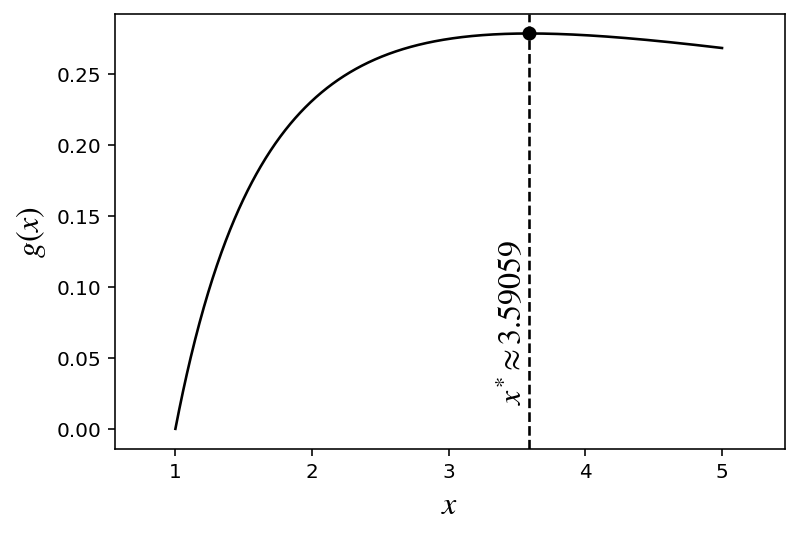

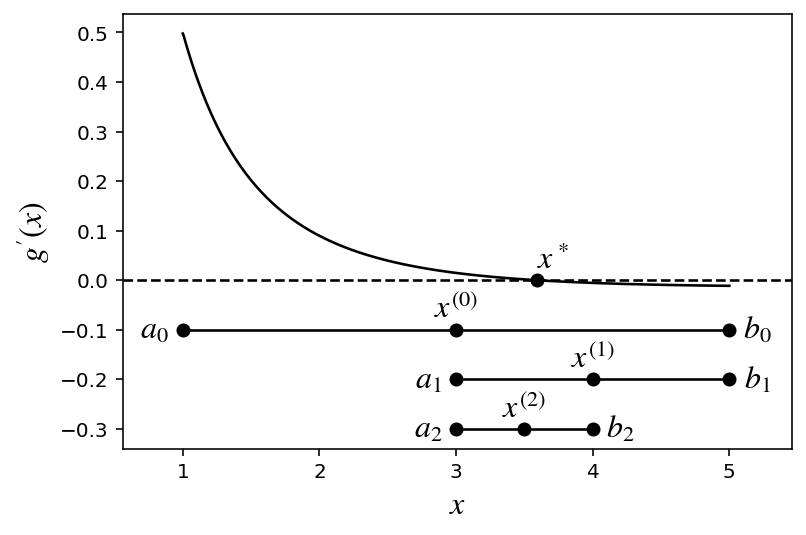

In [5]:


def add_annotations(x_mat, y_mat):
    """
    Annotate the horizontal lines.

    Traverse rows of the matrix of x and y matrices, annotating the dots as
    necessary.
    """
    for col in range(x_mat.shape[1]):
        a_str = '$a_{{{:d}}}$'.format(col)
        b_str = '$b_{{{:d}}}$'.format(col)
        x_str = '$x^{{({:d})}}$'.format(col)
        plt.annotate(a_str,
                     xy=(x_mat[0, col], y_mat[0, col]),
                     textcoords='offset points',
                     xytext=(-14, 0),
                     horizontalalignment='center',
                     verticalalignment='center',
                     fontsize=fnt_sz)
        plt.annotate(x_str,
                     xy=(x_mat[1, col], y_mat[1, col]),
                     textcoords='offset points',
                     xytext=(0, 6),
                     horizontalalignment='center',
                     fontsize=fnt_sz)
        plt.annotate(b_str,
                     xy=(x_mat[2, col], y_mat[2, col]),
                     textcoords='offset points',
                     xytext=(14, 0),
                     horizontalalignment='center',
                     verticalalignment='center',
                     fontsize=fnt_sz)


# Create the plots
mpl.rcParams['mathtext.fontset'] = 'stix'
fnt_sz = 16
lin_wid = 1.3
mrk_sz = 12

fig21 = plt.figure()
ax21 = fig21.add_subplot(1, 1, 1)
ax21.plot(x, y)
ax21.axvline(crit_x, linestyle='--')
ax21.plot(crit_x, crit_y, marker='.')
ax21.set_xlabel(r'$x$', fontsize=fnt_sz)
ax21.set_ylabel(r'$g(x)$', fontsize=fnt_sz)
ax21.annotate(r'$x^{{*}} \approx {:.5f}$'.format(crit_x),
              xy=(crit_x, 0),
              textcoords='offset points',
              xytext=(-16, 16),
              rotation=90,
              fontsize=fnt_sz)
xlims = np.asarray(ax21.get_xlim())
ax21.set_xlim(xlims[0] * 0.7, xlims[1] * 1.05)


fig22 = plt.figure()
ax22 = fig22.add_subplot(1, 1, 1)
ax22.plot(x, dydx)
ax22.axhline(0, linestyle='--')
ax22.set_xlabel(r'$x$', fontsize=fnt_sz)
ax22.set_ylabel(r"$g'(x)$", fontsize=fnt_sz)
ax22.plot(crit_x, crit_dydx, marker='.')
ax22.annotate(r'$x^*$',
              xy=(crit_x, crit_dydx),
              textcoords='offset points',
              xytext=(0, 10),
              verticalalignment='center',
              fontsize=fnt_sz)
y_vec = np.array([-np.arange(1, 4) / 10]).T
y_mat = np.tile(y_vec, x_mat.shape[1]).T
ax22.plot(x_mat, y_mat, marker='.')
add_annotations(x_mat, y_mat)
xlims = np.asarray(ax22.get_xlim())
ax22.set_xlim(xlims[0] * 0.7, xlims[1] * 1.05)

for fig in (fig21, fig22):
    for ax in fig.axes:
        for lin in ax.lines:
            lin.set_color('k')
            lin.set_linewidth(lin_wid)
            lin.set_markersize(mrk_sz)

plt.show()


 Those plots look great, and the value is fairly close to the
 book one. I could have probably got closer if I used the equation for the
 derivative, but this finite difference version would work fine for data where
 we didn't have the derivative.